In [1]:
%matplotlib inline  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
from scipy.optimize import curve_fit
import matplotlib as mpl
from cycler import cycler

In [2]:
# Setup rc parameters
mpl.rcParams['errorbar.capsize'] = 2
mpl.rcParams['lines.linewidth'] = 1.25
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['font.family'] = 'DejaVu Sans'
mpl.rcParams['font.sans-serif'] = ['Arial']
mpl.rcParams['axes.prop_cycle'] = cycler(color=('#D43F3F','k'))

In [3]:
# define hill-curve
def DRC(x, bottom,top,logEC50,HillSlope):
	# This is copied from GraphPad
	y = bottom+(top-bottom)/(1+ (10**((logEC50-x)*HillSlope)))
	return y

In [4]:
# Test data
dose = [1000/(3**x) for x in range(0,7)][::-1]
d1 = [100,98,100,96,95,97,90]
e1 = [2,1,0.5,2,4,0.7,3]
d2 = [96,85,72,42,32,28,31]
e2 = [4,6,3,11,10,13,9]

In [5]:
conc = np.log10(dose)
refDose = np.linspace(min(conc)-0.2,max(conc)+0.2,1e3)

/home/yunkai/miniconda3/envs/data_science/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


In [6]:
fitbound = ((-100,0,-np.inf,-np.inf),(100,200,np.inf,0))

[-100.           99.37535038    5.57188397   -0.52327321]
[28.99882018 94.74313691  1.22527958 -1.62479202]


<ErrorbarContainer object of 3 artists>

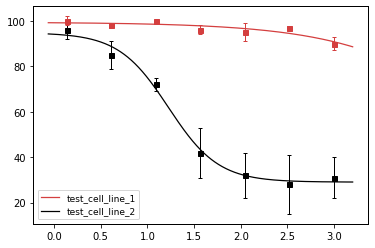

In [7]:
popt, pcov = curve_fit(DRC, conc, d1, bounds=fitbound, maxfev=10000)
print(popt)
plt.plot(refDose,DRC(refDose,*popt),label='test_cell_line_1')
popt, pcov = curve_fit(DRC, conc, d2, bounds=fitbound, maxfev=10000)
print(popt)
plt.plot(refDose,DRC(refDose,*popt),label='test_cell_line_2')
plt.legend(fontsize=9,loc=3)
plt.errorbar(conc,d1,yerr=e1,
			mfc='#D43F3F', elinewidth=1, zorder=2, ms=5, fmt='s',
			label='_nolabel_')
plt.errorbar(conc,d2,yerr=e2,
			mfc='k', elinewidth=1, zorder=2, ms=5, fmt='s',
			label='_nolabel_')